# Import des modules nécessaires

In [1]:
import pandas as pd

# Import du fichier des résultats

Le format du fichier n'est vraiment pas évident... On commence par lire le header, que l'on va devoir modifier. Il ne contient pas assez de colonnes.

In [2]:
import csv

csvfile = open('Leg_2017_Resultats_BVT_T1_c.txt', 'r')

csvreader = csv.reader(csvfile, delimiter=';')
for header in csvreader:
    print(header)
    break

csvfile.close()

['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp']


On le complète jusqu'à ce qu'il nous permette de loger les communes ayant plus de 1 candidat...

In [3]:
while len(header) < 300:
    header += header[-8:]

print(header)

['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Nuance', 'Voix'

On peut maintenant charger le fichier complet.

In [4]:
df = pd.read_csv('Leg_2017_Resultats_BVT_T1_c.txt',
                 sep=';',
                 encoding='iso-8859-1',
                 decimal=',',
                 skiprows=1,
                 names=header
                ).dropna(axis='columns', how='all')

print(df.shape)

C:\Users\pierr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,6,142,143,144,145,150,151,152,153,158,159,160,161,166,167,168,169,174,175,176,177,182,183,184,185,190,191,192,193,198,199,200,201,206,207,208,209,214,215,216,217,222,223,224,225,230,231,232,233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(69242, 237)


# Premières analyses

In [5]:
df.head()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Ins.25,% Voix/Exp.25,N°Panneau.26,Sexe.26,Nom.26,Prénom.26,Nuance.26,Voix.26,% Voix/Ins.26,% Voix/Exp.26
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,1,598,261,43.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,1,211,79,37.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,1,1126,637,56.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,2,1134,579,51.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,3,1117,560,50.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
condition1 = (df['Libellé de la commune'] == 'Angers')
condition2 = (df['Code de la circonscription'] == 1)
condition3 = (df['Code du b.vote'] == 103)

df.loc[condition1 & condition2 & condition3].dropna(axis='columns')

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Ins.14,% Voix/Exp.14,N°Panneau.15,Sexe.15,Nom.15,Prénom.15,Nuance.15,Voix.15,% Voix/Ins.15,% Voix/Exp.15
30628,49,Maine-et-Loire,1,1ère circonscription,7,Angers,103,1184,621,52.45,...,1.77,3.8,3.0,M,DIRAND,Gaétan,EXD,5.0,0.42,0.9


In [7]:
df.loc[condition1]['Inscrits'].sum()

89539

On a 89 539 inscrits dans le Maine-et-Loire.

# Nettoyage du format du fichier

In [11]:
mycols = []

for col in df.columns:
    if ("Prénom" in col) or (("Voix" in col) and not ('%' in col)):
        mycols += [col]
        
print(mycols)

['Prénom', 'Voix', 'Prénom.1', 'Voix.1', 'Prénom.2', 'Voix.2', 'Prénom.3', 'Voix.3', 'Prénom.4', 'Voix.4', 'Prénom.5', 'Voix.5', 'Prénom.6', 'Voix.6', 'Prénom.7', 'Voix.7', 'Prénom.8', 'Voix.8', 'Prénom.9', 'Voix.9', 'Prénom.10', 'Voix.10', 'Prénom.11', 'Voix.11', 'Prénom.12', 'Voix.12', 'Prénom.13', 'Voix.13', 'Prénom.14', 'Voix.14', 'Prénom.15', 'Voix.15', 'Prénom.16', 'Voix.16', 'Prénom.17', 'Voix.17', 'Prénom.18', 'Voix.18', 'Prénom.19', 'Voix.19', 'Prénom.20', 'Voix.20', 'Prénom.21', 'Voix.21', 'Prénom.22', 'Voix.22', 'Prénom.23', 'Voix.23', 'Prénom.24', 'Voix.24', 'Prénom.25', 'Voix.25', 'Prénom.26', 'Voix.26']


In [12]:
df[mycols]

,Prénom,Voix,Prénom.1,Voix.1,Prénom.2,Voix.2,Prénom.3,Voix.3,Prénom.4,Voix.4,...,Prénom.22,Voix.22,Prénom.23,Voix.23,Prénom.24,Voix.24,Prénom.25,Voix.25,Prénom.26,Voix.26
0,Electre,0,Catherine,3,Line,28,Sylviane,10.0,Anne,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jean-Michel,0,Guy,2,Mylène,1,Bertrand,14.0,Elodie,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jean-Michel,0,Guy,2,Mylène,12,Bertrand,79.0,Elodie,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jean-Michel,1,Guy,3,Mylène,12,Bertrand,79.0,Elodie,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jean-Michel,0,Guy,1,Mylène,11,Bertrand,75.0,Elodie,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jean-Michel,0,Guy,3,Mylène,4,Bertrand,84.0,Elodie,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jean-Michel,3,Guy,5,Mylène,5,Bertrand,69.0,Elodie,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jean-Michel,1,Guy,4,Mylène,13,Bertrand,74.0,Elodie,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jean-Michel,0,Guy,2,Mylène,7,Bertrand,67.0,Elodie,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Jean-Michel,0,Guy,1,Mylène,10,Bertrand,64.0,Elodie,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in range(0, len(mycols), 2):
    print(mycols[i:i+2])

['Prénom', 'Voix']
['Prénom.1', 'Voix.1']
['Prénom.2', 'Voix.2']
['Prénom.3', 'Voix.3']
['Prénom.4', 'Voix.4']
['Prénom.5', 'Voix.5']
['Prénom.6', 'Voix.6']
['Prénom.7', 'Voix.7']
['Prénom.8', 'Voix.8']
['Prénom.9', 'Voix.9']
['Prénom.10', 'Voix.10']
['Prénom.11', 'Voix.11']
['Prénom.12', 'Voix.12']
['Prénom.13', 'Voix.13']
['Prénom.14', 'Voix.14']
['Prénom.15', 'Voix.15']
['Prénom.16', 'Voix.16']
['Prénom.17', 'Voix.17']
['Prénom.18', 'Voix.18']
['Prénom.19', 'Voix.19']
['Prénom.20', 'Voix.20']
['Prénom.21', 'Voix.21']
['Prénom.22', 'Voix.22']
['Prénom.23', 'Voix.23']
['Prénom.24', 'Voix.24']
['Prénom.25', 'Voix.25']
['Prénom.26', 'Voix.26']


In [14]:
dfs = []

for i in range(0, len(mycols), 2):
    dft = df[mycols[i:i+2]]
    dft.columns = ['Prénom', 'Voix']
    dfs.append(dft)

df_prenoms = pd.concat(dfs)

df_prenoms

,Prénom,Voix
0,Electre,0.0
1,Jean-Michel,0.0
2,Jean-Michel,0.0
3,Jean-Michel,1.0
4,Jean-Michel,0.0
5,Jean-Michel,0.0
6,Jean-Michel,3.0
7,Jean-Michel,1.0
8,Jean-Michel,0.0
9,Jean-Michel,0.0


On a maintenant un beau DataFrame avec prénoms et voix. Ne reste plus qu'à grouper par prénom.

# Quelques graphiques

In [39]:
df_prenoms = df_prenoms.groupby(["Prénom"])["Voix"].sum()

In [40]:
df_prenoms.sort_values(ascending=False).head(10)

Prénom
Philippe      524342.0
Christophe    271933.0
Pierre        267299.0
Eric          264430.0
Michel        262330.0
Stéphane      250573.0
Isabelle      246712.0
Olivier       244167.0
Valérie       242411.0
François      239618.0
Name: Voix, dtype: float64

"Philippe" semble être loin devant...

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

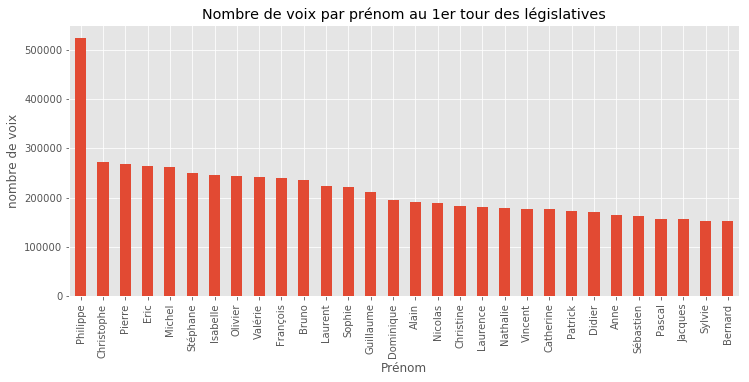

In [42]:
df_prenoms.sort_values(ascending=False) \
    .head(30) \
    .plot(kind='bar', figsize=(12, 5))
    
plt.title("Nombre de voix par prénom au 1er tour des législatives")
plt.ylabel("nombre de voix")
plt.show()

# Contre-expertise en ramenant au nombre de candidats

On va supposer qu'un candidat est déterminé de manière unique par son nom, son numéro de circonscription et son département.
Il nous reste à retravailler le fichier.

In [43]:
mycols = []

for col in df.columns:
    if ("Prénom" in col) or ("Nom" in col):
        mycols += [col]
        
print(mycols)

['Nom', 'Prénom', 'Nom.1', 'Prénom.1', 'Nom.2', 'Prénom.2', 'Nom.3', 'Prénom.3', 'Nom.4', 'Prénom.4', 'Nom.5', 'Prénom.5', 'Nom.6', 'Prénom.6', 'Nom.7', 'Prénom.7', 'Nom.8', 'Prénom.8', 'Nom.9', 'Prénom.9', 'Nom.10', 'Prénom.10', 'Nom.11', 'Prénom.11', 'Nom.12', 'Prénom.12', 'Nom.13', 'Prénom.13', 'Nom.14', 'Prénom.14', 'Nom.15', 'Prénom.15', 'Nom.16', 'Prénom.16', 'Nom.17', 'Prénom.17', 'Nom.18', 'Prénom.18', 'Nom.19', 'Prénom.19', 'Nom.20', 'Prénom.20', 'Nom.21', 'Prénom.21', 'Nom.22', 'Prénom.22', 'Nom.23', 'Prénom.23', 'Nom.24', 'Prénom.24', 'Nom.25', 'Prénom.25', 'Nom.26', 'Prénom.26']


In [44]:
dfs = []

for i in range(0, len(mycols), 2):
    dft = df[mycols[i:i+2] + ['Code du département', 'Code de la circonscription']]
    dft.columns = ['Nom', 'Prénom', 'Code dépt', 'Code circo']
    dfs.append(dft)

df_prenoms_circo = pd.concat(dfs)

df_prenoms_circo.head()

,Nom,Prénom,Code dépt,Code circo
0,DRACOS,Electre,1,4
1,BOULMÉ,Jean-Michel,1,5
2,BOULMÉ,Jean-Michel,1,5
3,BOULMÉ,Jean-Michel,1,5
4,BOULMÉ,Jean-Michel,1,5


En éliminants les duplicatas, on obtient le nombre de  candidats distincts en France.

In [45]:
df_prenoms_circo = df_prenoms_circo.dropna(how='any').drop_duplicates()

In [46]:
df_prenoms_circo.head()

,Nom,Prénom,Code dépt,Code circo
0,DRACOS,Electre,1,4
1,BOULMÉ,Jean-Michel,1,5
11,LAHY,Éric,1,3
14,GOUTAGNY,Vincent,1,2
24,LÉPAGNOT,Maude,1,1


In [47]:
df_prenoms_circo.shape

(8103, 4)

On avait donc 8103 candidats aux législatives.

In [48]:
df_prenoms_circo["Prénom"].value_counts(ascending=False).head(10)

Philippe      131
Michel        108
Dominique      91
Christophe     88
Pierre         85
Isabelle       83
Laurent        78
Alain          77
Eric           77
Patrick        74
Name: Prénom, dtype: int64

Parmi eux, effectivement beaucoup de "Philippe". On n'est pas forcément étonné qu'il ait reçu tant de voix.

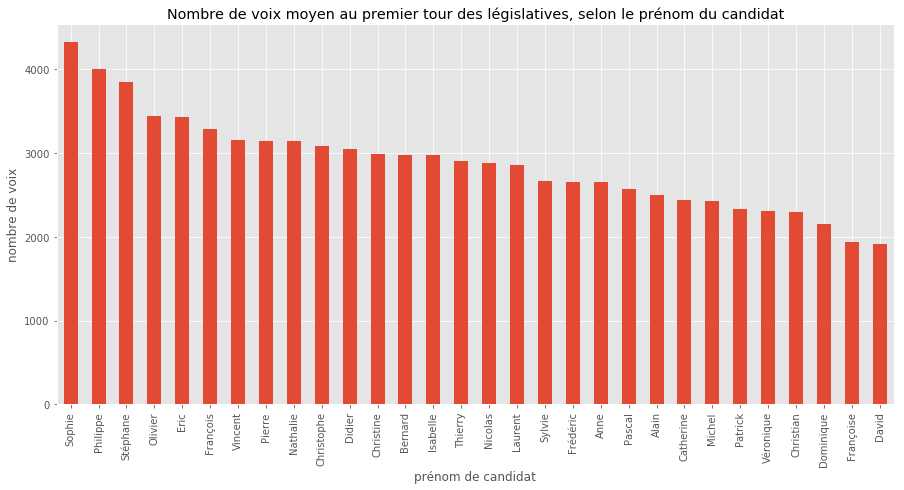

In [61]:
condition = (df_prenoms_circo["Prénom"].value_counts() > 50)

df_prenoms.divide(df_prenoms_circo["Prénom"].value_counts()[condition]) \
    .sort_values(ascending=False) \
    .head(30) \
    .plot(kind='bar', figsize=(15, 7))

plt.title("Nombre de voix moyen au premier tour des législatives, selon le prénom du candidat")
plt.ylabel("nombre de voix")
plt.xlabel("prénom de candidat")

plt.show()